In [1]:
from pyspark.sql import SparkSession
try:
    appName = "PySpark IPL Data"
    master = "local"
    spark = SparkSession.builder.master(master).appName(appName).getOrCreate()
except Exception as e:
    print(e)

2021-10-06 09:32:54,917 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


# Importing libraries

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from pyspark.sql.functions import *

# Reading csv file from HDFS into spark dataframe and creating temp view

In [3]:
df = spark.read.csv("hdfs://localhost:9000/Sample/ipl_matches.csv",header=True)
df.createOrReplaceTempView("ipl_view")

In [4]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- city: string (nullable = true)
 |-- date: string (nullable = true)
 |-- player_of_match: string (nullable = true)
 |-- venue: string (nullable = true)
 |-- neutral_venue: string (nullable = true)
 |-- team1: string (nullable = true)
 |-- team2: string (nullable = true)
 |-- toss_winner: string (nullable = true)
 |-- toss_decision: string (nullable = true)
 |-- winner: string (nullable = true)
 |-- result: string (nullable = true)
 |-- result_margin: string (nullable = true)
 |-- eliminator: string (nullable = true)
 |-- method: string (nullable = true)
 |-- umpire1: string (nullable = true)
 |-- umpire2: string (nullable = true)



In [5]:
df.show(5)

+------+----------+----------+---------------+--------------------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+---------+--------------+
|    id|      city|      date|player_of_match|               venue|neutral_venue|               team1|               team2|         toss_winner|toss_decision|              winner| result|result_margin|eliminator|method|  umpire1|       umpire2|
+------+----------+----------+---------------+--------------------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+---------+--------------+
|335982| Bangalore|2008-04-18|    BB McCullum|M Chinnaswamy Sta...|            0|Royal Challengers...|Kolkata Knight Ri...|Royal Challengers...|        field|Kolkata Knight Ri...|   runs|          140|         N|    NA|Asad Rauf|   RE Koertzen|
|335983|Chandigarh|2

# ANALYSING TOTAL MATCHES WON BY EACH TEAM

In [6]:
most_winners=spark.sql("select winner,count('') as total_wins from ipl_view group by winner")

In [7]:
most_winners.sort(desc('total_wins')).show()

+--------------------+----------+
|              winner|total_wins|
+--------------------+----------+
|      Mumbai Indians|       120|
| Chennai Super Kings|       106|
|Kolkata Knight Ri...|        99|
|Royal Challengers...|        91|
|     Kings XI Punjab|        88|
|    Rajasthan Royals|        81|
|    Delhi Daredevils|        67|
| Sunrisers Hyderabad|        66|
|     Deccan Chargers|        29|
|      Delhi Capitals|        19|
|       Gujarat Lions|        13|
|       Pune Warriors|        12|
|Rising Pune Super...|        10|
|Kochi Tuskers Kerala|         6|
|Rising Pune Super...|         5|
|                  NA|         4|
+--------------------+----------+



# Visualizing the wins my each team with matplotlib pie chart

In [8]:
win_df=most_winners.toPandas()

In [9]:
team_names=win_df['winner']
total_win=win_df['total_wins']

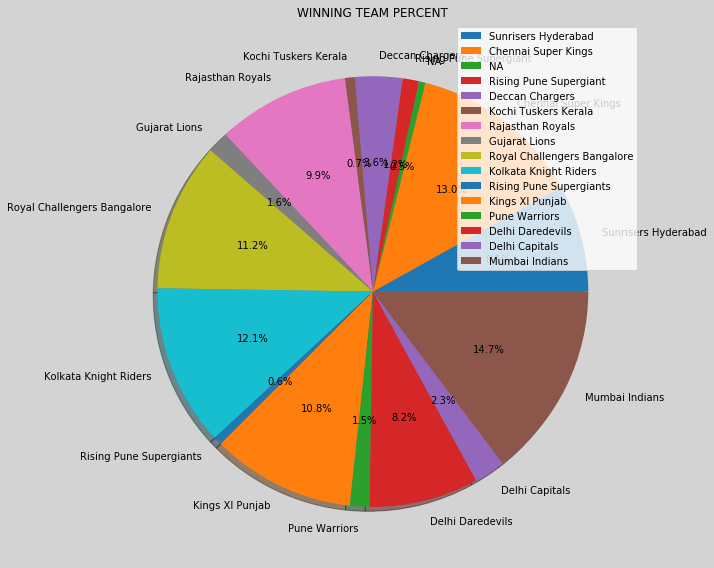

In [10]:
fig,ax=plt.subplots(figsize=(10,8))
fig.set_facecolor('lightgrey')
plt.pie(total_win, labels=team_names,
autopct='%1.1f%%', shadow=True)
plt.title("WINNING TEAM PERCENT")
plt.legend()
plt.tight_layout()
plt.show()

# FINDING CITY WHICH HOSTED MOST MATCHES

In [11]:
city_hosted = spark.sql("select city, count('') as matches_hosted from ipl_view group by city")
city_hosted.sort(desc('matches_hosted')).show()

+-------------+--------------+
|         city|matches_hosted|
+-------------+--------------+
|       Mumbai|           101|
|      Kolkata|            77|
|        Delhi|            74|
|    Bangalore|            65|
|    Hyderabad|            64|
|      Chennai|            57|
|   Chandigarh|            56|
|       Jaipur|            47|
|         Pune|            38|
|    Abu Dhabi|            29|
|        Dubai|            26|
|    Bengaluru|            15|
|       Durban|            15|
|Visakhapatnam|            13|
|           NA|            13|
|    Ahmedabad|            12|
|    Centurion|            12|
|      Sharjah|            12|
|       Rajkot|            10|
|       Indore|             9|
+-------------+--------------+
only showing top 20 rows



# PLAYERS WITH MOST MOM AWARDS

In [12]:
most_mom = spark.sql("select player_of_match,count('') as total_mom from ipl_view group by player_of_match")
most_mom.sort(desc('total_mom')).show()

+---------------+---------+
|player_of_match|total_mom|
+---------------+---------+
| AB de Villiers|       23|
|       CH Gayle|       22|
|      RG Sharma|       18|
|      DA Warner|       17|
|       MS Dhoni|       17|
|      YK Pathan|       16|
|      SR Watson|       16|
|       SK Raina|       14|
|        V Kohli|       13|
|      G Gambhir|       13|
|     MEK Hussey|       12|
|      AM Rahane|       12|
|     AD Russell|       11|
|       DR Smith|       11|
|       A Mishra|       11|
|       V Sehwag|       11|
|     KA Pollard|       11|
|      JH Kallis|       10|
|      AT Rayudu|       10|
|      RA Jadeja|        9|
+---------------+---------+
only showing top 20 rows



# TOSS WIN MATCH WIN

In [13]:
toss_match_win = spark.sql("select toss_winner, count('') as win from ipl_view where toss_winner==winner group by toss_winner")
toss_match_win.sort(desc('win')).show()

+--------------------+---+
|         toss_winner|win|
+--------------------+---+
| Chennai Super Kings| 61|
|      Mumbai Indians| 61|
|Kolkata Knight Ri...| 55|
|    Rajasthan Royals| 44|
|Royal Challengers...| 43|
|     Kings XI Punjab| 36|
|    Delhi Daredevils| 35|
| Sunrisers Hyderabad| 29|
|     Deccan Chargers| 19|
|       Gujarat Lions| 10|
|      Delhi Capitals| 10|
|Rising Pune Super...|  5|
|Kochi Tuskers Kerala|  4|
|Rising Pune Super...|  3|
|       Pune Warriors|  3|
+--------------------+---+



# TOSS WIN MATCH LOSE

In [14]:
toss_win_match_lose = spark.sql("select toss_winner, count('')  as loss from ipl_view where toss_winner!=winner group by toss_winner")
toss_win_match_lose.sort(desc('loss')).show()

+--------------------+----+
|         toss_winner|loss|
+--------------------+----+
|     Kings XI Punjab|  49|
|    Delhi Daredevils|  45|
|      Mumbai Indians|  45|
|Royal Challengers...|  44|
|Kolkata Knight Ri...|  43|
|    Rajasthan Royals|  43|
| Chennai Super Kings|  36|
| Sunrisers Hyderabad|  28|
|     Deccan Chargers|  24|
|       Pune Warriors|  17|
|      Delhi Capitals|  10|
|       Gujarat Lions|   5|
|Kochi Tuskers Kerala|   4|
|Rising Pune Super...|   4|
|Rising Pune Super...|   1|
+--------------------+----+



# TOSS LOSE MATCH WIN

In [15]:
toss_lose_match_win = spark.sql("select winner, count('') as win from ipl_view where winner!=toss_winner group by winner")
toss_lose_match_win.sort(desc('win')).show()

+--------------------+---+
|              winner|win|
+--------------------+---+
|      Mumbai Indians| 59|
|     Kings XI Punjab| 52|
|Royal Challengers...| 48|
| Chennai Super Kings| 45|
|Kolkata Knight Ri...| 44|
| Sunrisers Hyderabad| 37|
|    Rajasthan Royals| 37|
|    Delhi Daredevils| 32|
|     Deccan Chargers| 10|
|       Pune Warriors|  9|
|      Delhi Capitals|  9|
|Rising Pune Super...|  5|
|                  NA|  4|
|       Gujarat Lions|  3|
|Kochi Tuskers Kerala|  2|
|Rising Pune Super...|  2|
+--------------------+---+



# TOTAL HOME MATCHES PLAYED BY EACH TEAM

In [16]:
total_games=spark.sql("select team1,count('') as total_matches from ipl_view group by team1")
total_games.sort(desc('total_matches')).show()

+--------------------+-------------+
|               team1|total_matches|
+--------------------+-------------+
|Royal Challengers...|          108|
|      Mumbai Indians|           97|
|Kolkata Knight Ri...|           95|
| Chennai Super Kings|           94|
|     Kings XI Punjab|           92|
|    Delhi Daredevils|           83|
|    Rajasthan Royals|           70|
| Sunrisers Hyderabad|           59|
|     Deccan Chargers|           39|
|       Pune Warriors|           23|
|      Delhi Capitals|           19|
|       Gujarat Lions|           16|
|Rising Pune Super...|            7|
|Kochi Tuskers Kerala|            7|
|Rising Pune Super...|            7|
+--------------------+-------------+



# *BALL BY BALL ANALYSIS*

In [17]:
ball_df = spark.read.csv("hdfs://localhost:9000/Sample/ipl_balls.csv",header=True)
ball_df.createOrReplaceTempView("ipl_ball")

In [18]:
ball_df.show()

+------+------+----+----+-----------+-----------+---------+------------+----------+----------+------------+---------+--------------+----------------+-------+-----------+--------------------+--------------------+
|    id|inning|over|ball|    batsman|non_striker|   bowler|batsman_runs|extra_runs|total_runs|non_boundary|is_wicket|dismissal_kind|player_dismissed|fielder|extras_type|        batting_team|        bowling_team|
+------+------+----+----+-----------+-----------+---------+------------+----------+----------+------------+---------+--------------+----------------+-------+-----------+--------------------+--------------------+
|335982|     1|   6|   5| RT Ponting|BB McCullum|AA Noffke|           1|         0|         1|           0|        0|            NA|              NA|     NA|         NA|Kolkata Knight Ri...|Royal Challengers...|
|335982|     1|   6|   6|BB McCullum| RT Ponting|AA Noffke|           1|         0|         1|           0|        0|            NA|              NA|   

In [19]:
ball_df.printSchema()

root
 |-- id: string (nullable = true)
 |-- inning: string (nullable = true)
 |-- over: string (nullable = true)
 |-- ball: string (nullable = true)
 |-- batsman: string (nullable = true)
 |-- non_striker: string (nullable = true)
 |-- bowler: string (nullable = true)
 |-- batsman_runs: string (nullable = true)
 |-- extra_runs: string (nullable = true)
 |-- total_runs: string (nullable = true)
 |-- non_boundary: string (nullable = true)
 |-- is_wicket: string (nullable = true)
 |-- dismissal_kind: string (nullable = true)
 |-- player_dismissed: string (nullable = true)
 |-- fielder: string (nullable = true)
 |-- extras_type: string (nullable = true)
 |-- batting_team: string (nullable = true)
 |-- bowling_team: string (nullable = true)



# Converting type of column from string to integer type

In [20]:
df2 = ball_df.withColumn("batsman_runs",col("batsman_runs").cast("int"))
df2

DataFrame[id: string, inning: string, over: string, ball: string, batsman: string, non_striker: string, bowler: string, batsman_runs: int, extra_runs: string, total_runs: string, non_boundary: string, is_wicket: string, dismissal_kind: string, player_dismissed: string, fielder: string, extras_type: string, batting_team: string, bowling_team: string]

In [21]:
bat_run=df2.toPandas()

# TOTAL RUNS BY EACH BATSMAN

In [22]:
runs=bat_run.groupby(["batsman"])["batsman_runs"].sum()
runs

batsman
A Ashish Reddy     280
A Chandila           4
A Chopra            53
A Choudhary         25
A Dananjaya          4
                  ... 
YV Takawale        192
Yashpal Singh       47
Younis Khan          3
Yuvraj Singh      2750
Z Khan             117
Name: batsman_runs, Length: 537, dtype: int32

In [23]:
top_ten_bats=runs.sort_values(ascending=False).head(10)
top_ten_bats

batsman
V Kohli           5878
SK Raina          5368
DA Warner         5254
RG Sharma         5230
S Dhawan          5197
AB de Villiers    4849
CH Gayle          4772
MS Dhoni          4632
RV Uthappa        4607
G Gambhir         4217
Name: batsman_runs, dtype: int32

In [24]:
run_df=pd.DataFrame(top_ten_bats)

In [25]:
run_df

,batsman_runs
batsman,
V Kohli,5878
SK Raina,5368
DA Warner,5254
RG Sharma,5230
S Dhawan,5197
AB de Villiers,4849
CH Gayle,4772
MS Dhoni,4632
RV Uthappa,4607


# Bar chart for top ten run scorers in ipl

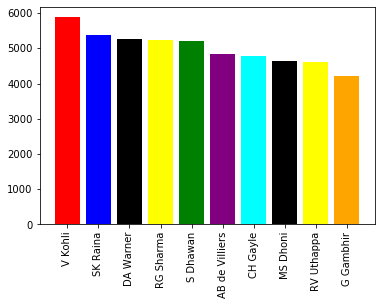

In [26]:
c=['red','blue','black','yellow','green','purple','cyan','black','yellow','orange']
plt.bar(x=run_df.index,height=run_df['batsman_runs'],color=c)
plt.xticks(rotation=90)
plt.show()

# FOR ANIMATED GRAPH OF TOP RUNSCORERS

## Loading dataset from csv file from local to pandas datframe

In [27]:
bcrbatsmen = pd.read_csv('/home/ubuntu/Downloads/iplbatsmen.csv', index_col = 'PLAYER')

# Using cumsum() to add the runs after each season

In [28]:
bcrbatsmen = bcrbatsmen.cumsum(axis=1).sort_values(by='2019', ascending = False)
bcrbatsmen

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
PLAYER,,,,,,,,,,,,
Virat Kohli,165,411,718,1275,1639,2273,2632,3137,4110,4418,4948,5412
Suresh Raina,421,855,1375,1813,2254,2802,3325,3699,4098,4540,4985,5368
Rohit Sharma,404,766,1170,1542,1975,2513,2903,3385,3874,4207,4493,4898
David Warner,0,163,445,769,1025,1435,1963,2525,3373,4014,4014,4706
Shikhar Dhawan,340,380,571,971,1540,1851,2228,2581,3082,3561,4058,4579
...,...,...,...,...,...,...,...,...,...,...,...,...
Rohan Raje,0,12,12,12,12,12,12,12,12,12,12,12
Karanveer Singh,0,0,0,0,0,0,0,11,11,11,11,11
Tyron Henderson,0,11,11,11,11,11,11,11,11,11,11,11


# Taking only top 50 players and trasposing the dataframe

In [29]:
bcrbatsmen = bcrbatsmen[:50].T
bcrbatsmen

PLAYER,Virat Kohli,Suresh Raina,Rohit Sharma,David Warner,Shikhar Dhawan,Chris Gayle,MS Dhoni,Robin Uthappa,AB de Villiers,Gautam Gambhir,...,Manoj Tiwary,Kumar Sangakkara,Shreyas Iyer,Naman Ojha,Suryakumar Yadav,Mandeep Singh,Dwayne Bravo,Karun Nair,Quinton de Kock,Subramaniam Badrinath
2008,165,421,404,0,340,0,414,320,95,534,...,104,320,0,0,0,0,178,0,0,192
2009,411,855,766,163,380,171,746,495,560,820,...,113,652,0,168,0,0,396,0,0,369
2010,718,1375,1170,445,571,463,1033,869,671,1097,...,350,1009,0,545,0,4,457,0,0,725
2011,1275,1813,1542,769,971,1071,1425,1133,983,1475,...,709,1367,0,705,0,51,468,0,0,1121
2012,1639,2254,1975,1025,1540,1804,1783,1538,1302,2065,...,969,1567,0,960,0,483,839,0,0,1317
2013,2273,2802,2513,1435,1851,2512,2244,1972,1662,2471,...,1115,1687,0,969,0,743,960,9,6,1441
2014,2632,3325,2903,1963,2228,2708,2615,2632,2057,2806,...,1267,1687,0,1201,164,767,968,339,159,1441
2015,3137,3699,3385,2525,2581,3199,2987,2996,2570,3133,...,1324,1687,439,1338,321,924,1163,520,281,1441
2016,4110,4098,3874,3373,3082,3426,3271,3390,3257,3634,...,1324,1687,469,1474,507,924,1262,877,726,1441
2017,4418,4540,4207,4014,3561,3626,3561,3778,3473,4132,...,1648,1687,807,1553,612,1112,1262,1158,726,1441


# Visualize with animated graph using bar chart race

In [30]:
import bar_chart_race as bcr

In [ ]:
bcr.bar_chart_race(bcrbatsmen, n_bars=10, fixed_max=True, steps_per_period=5, 
period_length= 800,filter_column_colors = True, cmap = 'Plotly', filename='final_runs.mp4',
title = 'Total Runs Scored by the Top 10 Batsmen in IPL')